In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np


In [42]:
def getMergedDf(final_df, df, name):
    partial_df = df[['periodDateUtc', 'actual']]
    partial_df.rename(columns={'actual': name}, inplace=True)

    #convert to datetime
    final_df['periodDateUtc'] = pd.to_datetime(final_df['periodDateUtc'], utc=True)
    partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)

    #get only year and month
    final_df['periodDateUtc'] = final_df['periodDateUtc'].dt.strftime('%Y-%m')
    partial_df['periodDateUtc'] = partial_df['periodDateUtc'].dt.strftime('%Y-%m')


    merged_df = final_df.merge(partial_df, on='periodDateUtc', how='inner')
    # # Fill NaN values in 'manufacturing' column with the previous date's row value
    # merged_df["manufacturing"].fillna(method="ffill", inplace=True)

    # # Convert 'periodDateUtc' to datetime (if needed)
    # merged_df["periodDateUtc"] = pd.to_datetime(merged_df["periodDateUtc"])

    return merged_df

In [68]:
# Read the JSON file into a pandas DataFrame
file_path = "./data/USD_Manufacturing_PMI.json"
ManufacturingPMI = pd.read_json(file_path)

file_path = "./data/USD_Unemployment_Rate.json"
UnemploymentRate = pd.read_json(file_path)

file_path = "./data/USD_Services_PMI.json"
ServicesPMI = pd.read_json(file_path)

file_path = "./data/USD - Industrial Production (MoM).json"
IndustrialProduction = pd.read_json(file_path)

file_path = "./data/USD - Average Hourly Earnings (MoM).json"
AverageHourlyEarnings = pd.read_json(file_path)

file_path = "./data/USD - Monthly Budget Statement.json"
MonthlyBudget = pd.read_json(file_path)

file_path = "./data/USD - OLTS Job Openings.json"
OLTSJobOpenings = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (MoM).json"
ProducerPriceIndex_FoodEnergyMoM = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (YoY).json"
ProducerPriceIndex_FoodEnergyYoY = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales (MoM).json"
RetailSales = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales Control Group.json"
RetailSalesControlGroup = pd.read_json(file_path)

file_path = "./data/USD - UoM 5-year Consumer Inflation Expectation.json"
ConsumerInflationExpectation = pd.read_json(file_path)

file_path = "./data/USD_ ISM_Manufacturing_Prices_Paid.json"
ManufacturingPricesPaid = pd.read_json(file_path)

file_path = "./data/USD_Composite_PMI.json"
CompositePMI = pd.read_json(file_path)

file_path = "./data/USD_Factory_Orders_MoM.json"
FactoryOrders = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_Employment_Index_ISM.json"
ManufacturingEmploymentIndex = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_New_Orders_Index_ISM.json"
ManufacturingNewOrdersIndex = pd.read_json(file_path)

file_path = "./data/USD_ISM_Manufacturing_PMI.json"
ISMManufacturing = pd.read_json(file_path)


final_df = pd.DataFrame()

final_df["periodDateUtc"] = UnemploymentRate["periodDateUtc"]
final_df["unemployment"] = UnemploymentRate["actual"]

final_df = getMergedDf(final_df, ManufacturingPMI, "ManufacturingPMI")
final_df = getMergedDf(final_df, ServicesPMI, "ServicesPMI")
final_df = getMergedDf(final_df, IndustrialProduction, "IndustrialProduction")
final_df = getMergedDf(final_df, AverageHourlyEarnings, "AverageHourlyEarnings")
final_df = getMergedDf(final_df, MonthlyBudget, "MonthlyBudget")
final_df = getMergedDf(final_df, OLTSJobOpenings, "OLTSJobOpenings")
final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyMoM, "ProducerPriceIndex_FoodEnergyMoM")
final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyYoY, "ProducerPriceIndex_FoodEnergyYoY")
final_df = getMergedDf(final_df, RetailSales, "RetailSales")
final_df = getMergedDf(final_df, RetailSalesControlGroup, "RetailSalesControlGroup")
final_df = getMergedDf(final_df, ConsumerInflationExpectation, "ConsumerInflationExpectation")
final_df = getMergedDf(final_df, ManufacturingPricesPaid, "ManufacturingPricesPaid")
final_df = getMergedDf(final_df, CompositePMI, "CompositePMI")
final_df = getMergedDf(final_df, FactoryOrders, "FactoryOrders")
final_df = getMergedDf(final_df, ManufacturingEmploymentIndex, "ManufacturingEmploymentIndex")
final_df = getMergedDf(final_df, ManufacturingNewOrdersIndex, "ManufacturingNewOrdersIndex")
final_df = getMergedDf(final_df, ISMManufacturing, "ISMManufacturing")

final_df.to_csv('./data/combined_data.csv', index=False)


print(ISMManufacturing.tail(4))

final_df.head()
final_df.tail()

C:\Users\ACER\AppData\Local\Temp\ipykernel_20084\2626132102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df.rename(columns={'actual': name}, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_20084\2626132102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_20084\2626132102.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,periodDateUtc,unemployment,ManufacturingPMI,ServicesPMI,IndustrialProduction,AverageHourlyEarnings,MonthlyBudget,OLTSJobOpenings,ProducerPriceIndex_FoodEnergyMoM,ProducerPriceIndex_FoodEnergyYoY,RetailSales,RetailSalesControlGroup,ConsumerInflationExpectation,ManufacturingPricesPaid,CompositePMI,FactoryOrders,ManufacturingEmploymentIndex,ManufacturingNewOrdersIndex,ISMManufacturing
651,2019-12,3.5,52.5,52.8,-0.3,0.1,-13.3,6.423,0.1,1.1,0.3,0.5,2.3,51.7,52.2,1.8,45.1,47.2,47.2
652,2019-12,3.5,52.5,52.2,-0.3,0.1,-13.3,6.423,0.1,1.1,0.3,0.5,2.2,51.7,52.7,1.8,45.1,47.2,47.2
653,2019-12,3.5,52.5,52.2,-0.3,0.1,-13.3,6.423,0.1,1.1,0.3,0.5,2.2,51.7,52.2,1.8,45.1,47.2,47.2
654,2019-12,3.5,52.5,52.2,-0.3,0.1,-13.3,6.423,0.1,1.1,0.3,0.5,2.3,51.7,52.7,1.8,45.1,47.2,47.2
655,2019-12,3.5,52.5,52.2,-0.3,0.1,-13.3,6.423,0.1,1.1,0.3,0.5,2.3,51.7,52.2,1.8,45.1,47.2,47.2


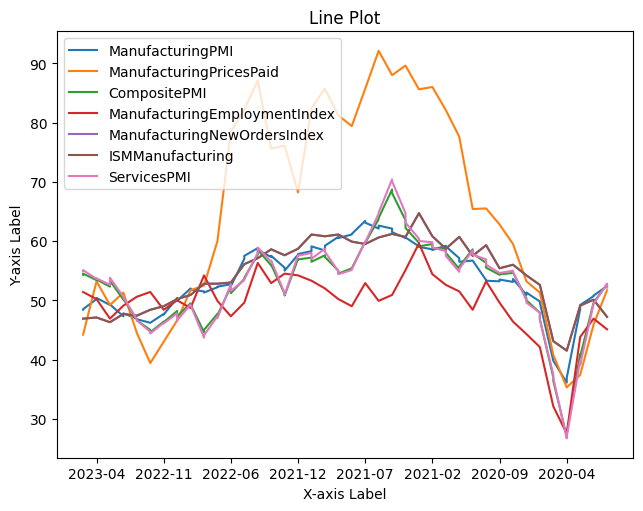

In [59]:


plt.plot(final_df['periodDateUtc'], final_df['ManufacturingPMI'], label='ManufacturingPMI')
plt.plot(final_df['periodDateUtc'], final_df['ManufacturingPricesPaid'], label='ManufacturingPricesPaid')
plt.plot(final_df['periodDateUtc'], final_df['CompositePMI'], label='CompositePMI')
plt.plot(final_df['periodDateUtc'], final_df['ManufacturingEmploymentIndex'], label='ManufacturingEmploymentIndex')
plt.plot(final_df['periodDateUtc'], final_df['ManufacturingNewOrdersIndex'], label='ManufacturingNewOrdersIndex')
plt.plot(final_df['periodDateUtc'], final_df['ISMManufacturing'], label='ISMManufacturing')
plt.plot(final_df['periodDateUtc'], final_df['ServicesPMI'], label='ServicesPMI')

# plt.plot(final_df['periodDateUtc'], final_df['unemployment'], label='unemployment')
# plt.plot(final_df['periodDateUtc'], final_df['services'], label='services')
# plt.plot(final_df['periodDateUtc'], final_df['IndustrialProduction'], label='IndustrialProduction')
# plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# # plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')
# plt.plot(final_df['periodDateUtc'], final_df['OLTSJobOpenings'], label='OLTSJobOpenings')
# plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyMoM'], label='ProducerPriceIndex_FoodEnergyMoM')
# plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyYoY'], label='ProducerPriceIndex_FoodEnergyYoY')
# plt.plot(final_df['periodDateUtc'], final_df['RetailSales'], label='RetailSales')
# plt.plot(final_df['periodDateUtc'], final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
# plt.plot(final_df['periodDateUtc'], final_df['ConsumerInflationExpectation'], label='ConsumerInflationExpectation')
# plt.plot(final_df['periodDateUtc'], final_df['FactoryOrders'], label='FactoryOrders')


plt.legend()
plt.tight_layout()  # Optional: Adjust the layout for better spacing
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

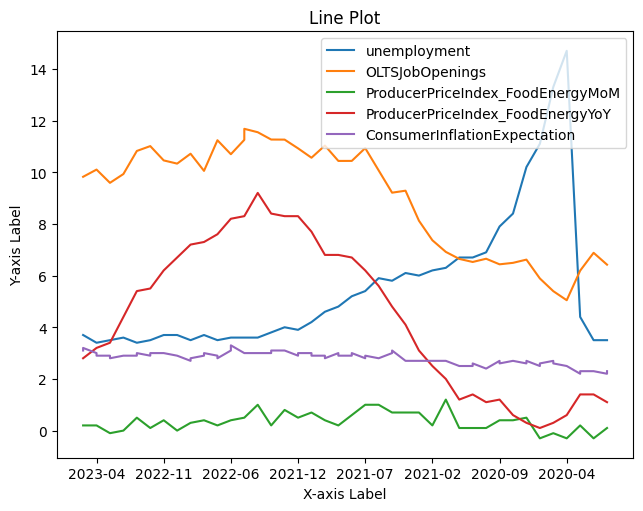

In [67]:
plt.plot(final_df['periodDateUtc'], final_df['unemployment'], label='unemployment')
plt.plot(final_df['periodDateUtc'], final_df['OLTSJobOpenings'], label='OLTSJobOpenings')
plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyMoM'], label='ProducerPriceIndex_FoodEnergyMoM')
plt.plot(final_df['periodDateUtc'], final_df['ProducerPriceIndex_FoodEnergyYoY'], label='ProducerPriceIndex_FoodEnergyYoY')
plt.plot(final_df['periodDateUtc'], final_df['ConsumerInflationExpectation'], label='ConsumerInflationExpectation')

# plt.plot(final_df['periodDateUtc'], final_df['RetailSales'], label='RetailSales')
# plt.plot(final_df['periodDateUtc'], final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
# plt.plot(final_df['periodDateUtc'], final_df['IndustrialProduction'], label='IndustrialProduction')
# plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# plt.plot(final_df['periodDateUtc'], final_df['FactoryOrders'], label='FactoryOrders')
# plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')

plt.legend()
plt.tight_layout()  # Optional: Adjust the layout for better spacing
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

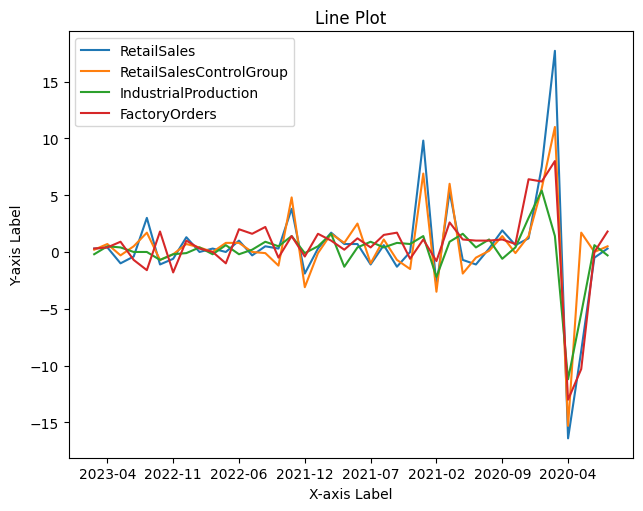

In [66]:
plt.plot(final_df['periodDateUtc'], final_df['RetailSales'], label='RetailSales')
plt.plot(final_df['periodDateUtc'], final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
plt.plot(final_df['periodDateUtc'], final_df['IndustrialProduction'], label='IndustrialProduction')
plt.plot(final_df['periodDateUtc'], final_df['FactoryOrders'], label='FactoryOrders')


# plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')
plt.legend()
plt.tight_layout()  # Optional: Adjust the layout for better spacing
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

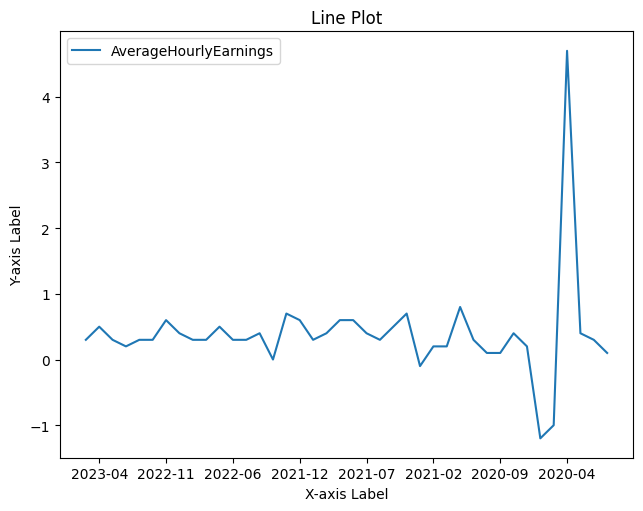

In [65]:
plt.plot(final_df['periodDateUtc'], final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# plt.plot(final_df['periodDateUtc'], final_df['MonthlyBudget'], label='MonthlyBudget')
plt.legend()
plt.tight_layout()  # Optional: Adjust the layout for better spacing
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

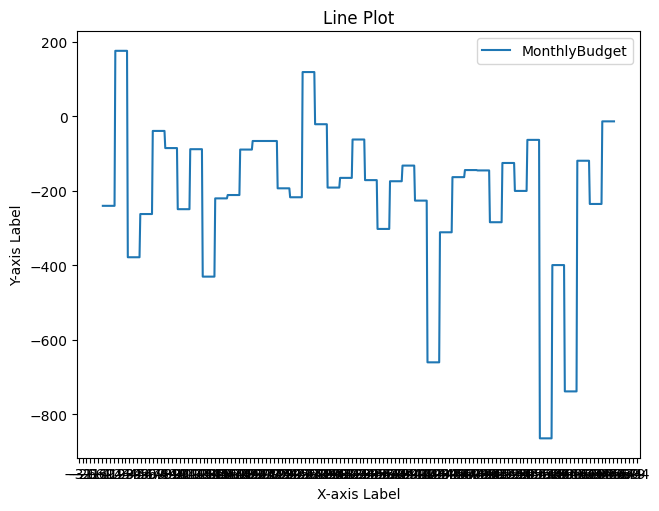

In [63]:
plt.plot(final_df.index, final_df['MonthlyBudget'], label='MonthlyBudget')
plt.legend()
plt.tight_layout()  # Optional: Adjust the layout for better spacing
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

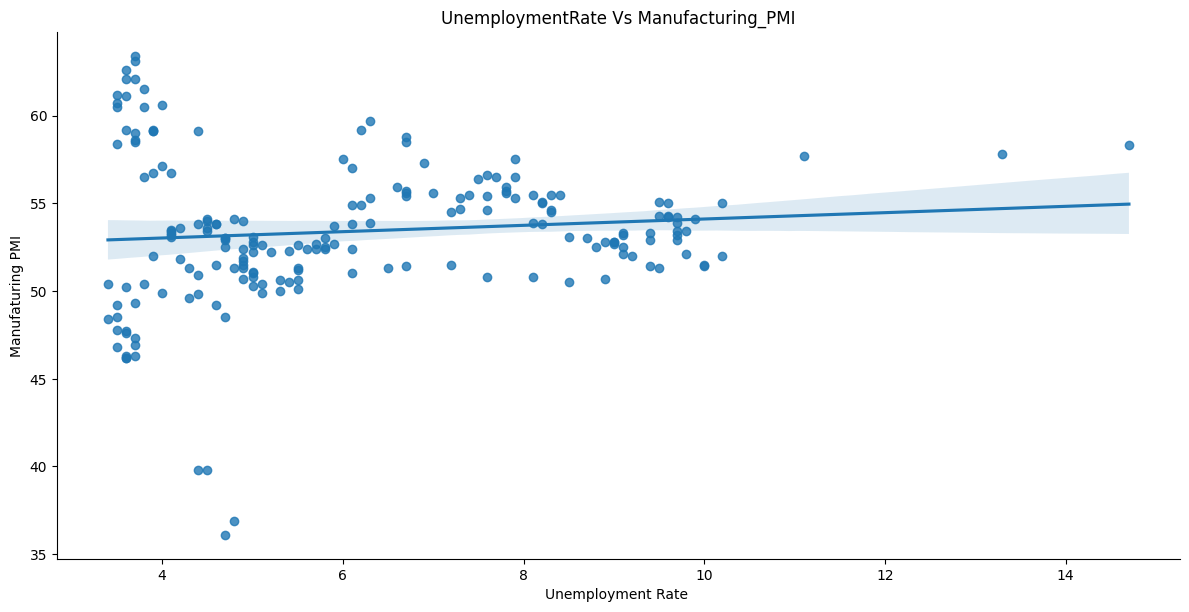

In [85]:
sns.lmplot(x='unemployment',y='manufaturing',data=final_df,aspect=2,height=6)
plt.xlabel('Unemployment Rate ')
plt.ylabel('Manufaturing PMI')
plt.title('UnemploymentRate Vs Manufacturing_PMI');


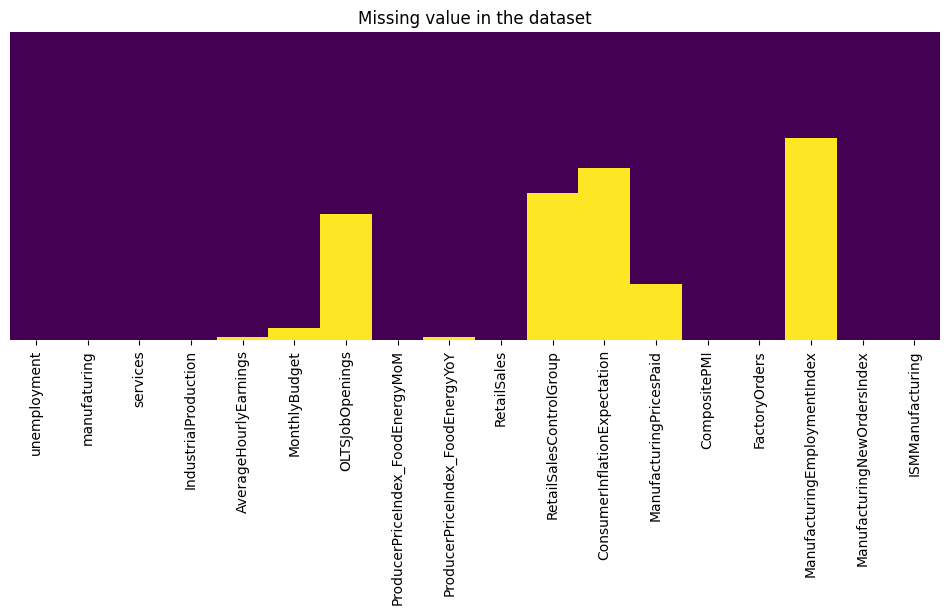

In [86]:
plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [87]:
final_df['manufaturing'].value_counts()

51.3    6
52.4    5
53.8    5
52.8    4
52.5    4
       ..
57.8    1
51.1    1
57.7    1
50.3    1
50.0    1
Name: manufaturing, Length: 102, dtype: int64

In [88]:
pd.get_dummies(final_df.manufaturing, drop_first=True, dummy_na=True).head()

,36.9,39.8,46.2,46.3,46.8,46.9,47.3,47.6,47.7,47.8,...,60.6,60.7,61.1,61.2,61.5,62.1,62.6,63.1,63.4,NaN
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# find outliers for unemployment variable

IQR = final_df.unemployment.quantile(0.75) - final_df.unemployment.quantile(0.25)
Lower_fence = final_df.unemployment.quantile(0.25) - (IQR * 3)
Upper_fence = final_df.unemployment.quantile(0.75) + (IQR * 3)
print('unemployment outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


# find outliers for unemployment variable

IQR = final_df.manufaturing.quantile(0.75) - final_df.manufaturing.quantile(0.25)
Lower_fence = final_df.manufaturing.quantile(0.25) - (IQR * 3)
Upper_fence = final_df.manufaturing.quantile(0.75) + (IQR * 3)
print('manufaturing outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

unemployment outliers are values < -6.900000000000001 or > 19.0
manufaturing outliers are values < 38.69999999999999 or > 68.10000000000001


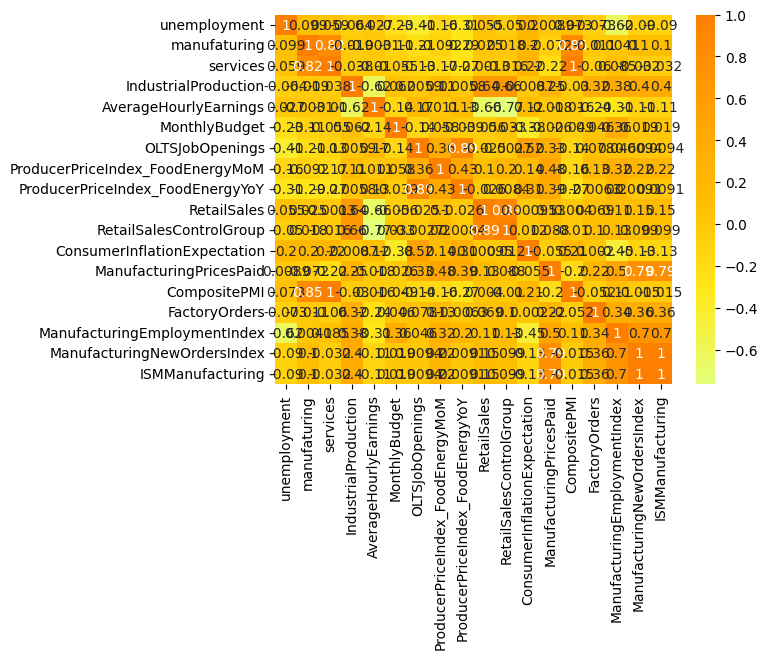

In [90]:
corr = final_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [91]:
print(final_df.describe())

       unemployment  manufaturing    services  IndustrialProduction  \
count    197.000000    197.000000  197.000000            197.000000   
mean       6.120305     53.403046   53.372081              0.097462   
std        2.250123      4.124564    5.168042              1.236331   
min        3.400000     36.100000   26.700000            -11.200000   
25%        4.200000     51.300000   51.400000             -0.200000   
50%        5.500000     53.200000   54.200000              0.200000   
75%        7.900000     55.500000   55.600000              0.600000   
max       14.700000     63.400000   70.400000              5.400000   

       AverageHourlyEarnings  MonthlyBudget  OLTSJobOpenings  \
count             195.000000     189.000000       116.000000   
mean                0.238410     -99.593704         6.972672   
std                 0.386771     141.746478         2.145207   
min                -1.200000    -864.000000         3.870000   
25%                 0.100000    -172.110

C:\Users\ACER\AppData\Local\Temp\ipykernel_16784\663370347.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column],bins=50,color='r',ax=ax)
C:\Users\ACER\AppData\Local\Temp\ipykernel_16784\663370347.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[column],bins=50,color='

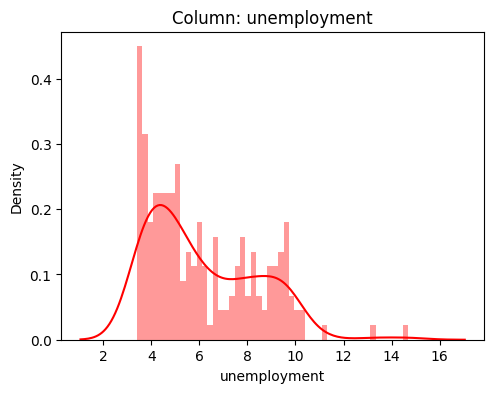

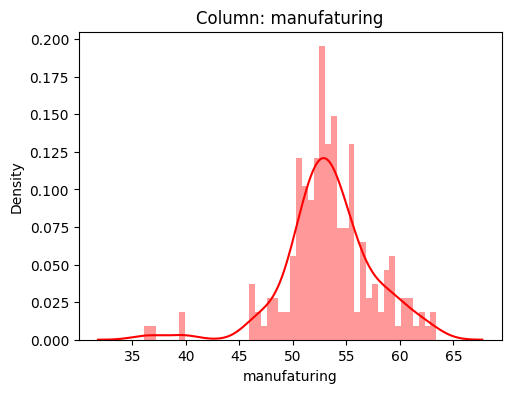

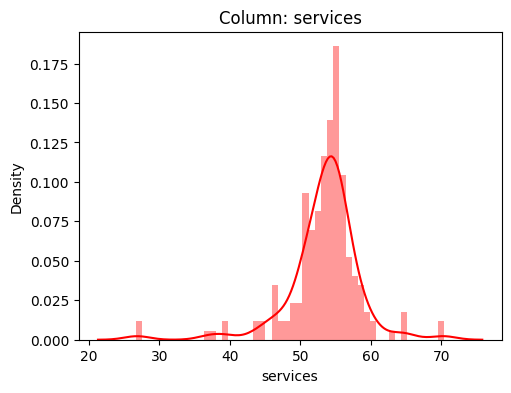

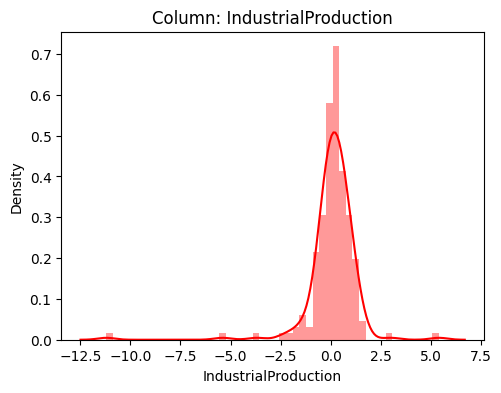

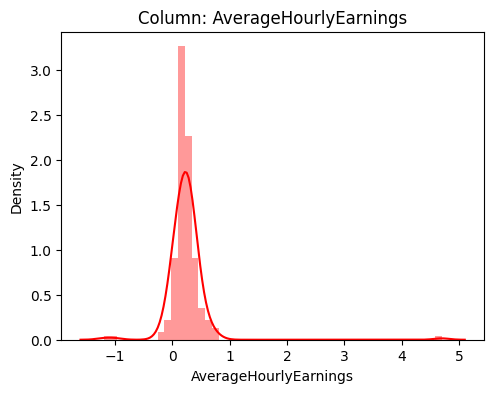

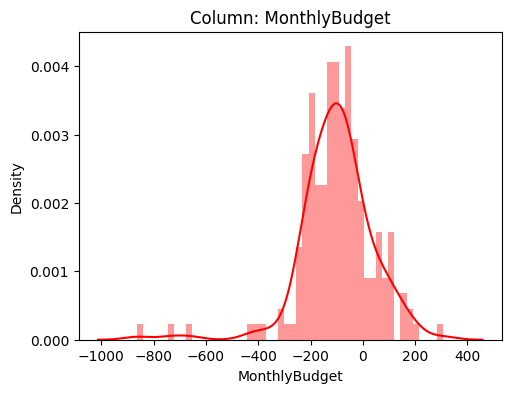

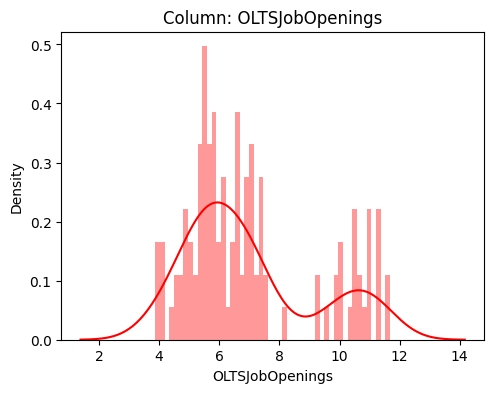

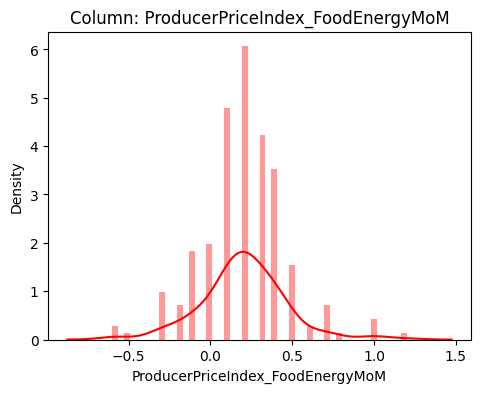

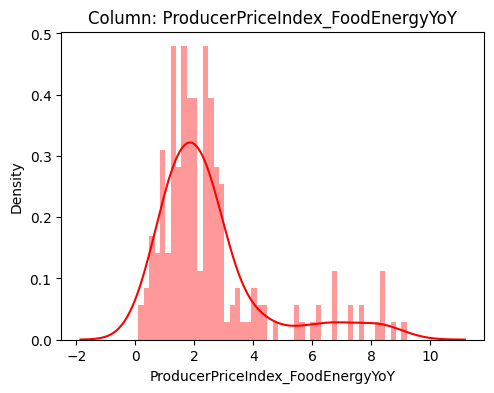

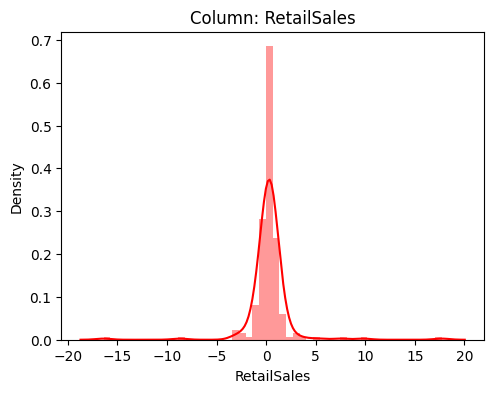

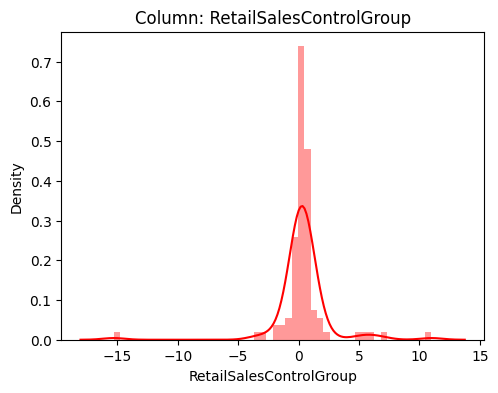

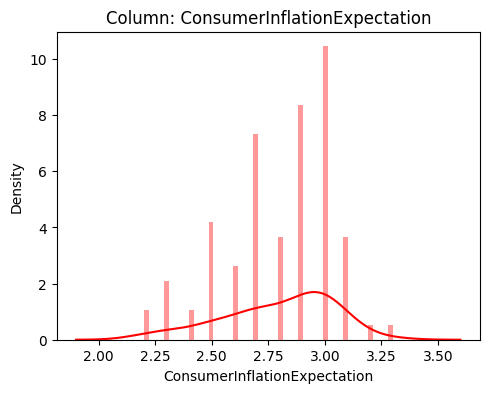

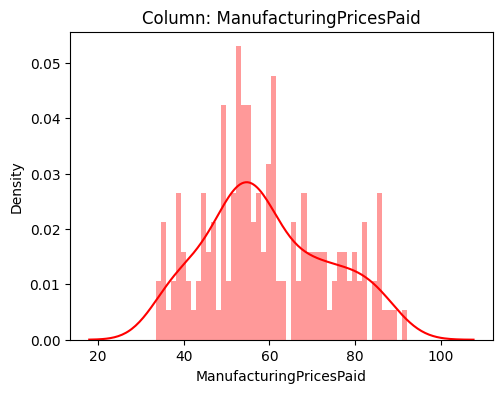

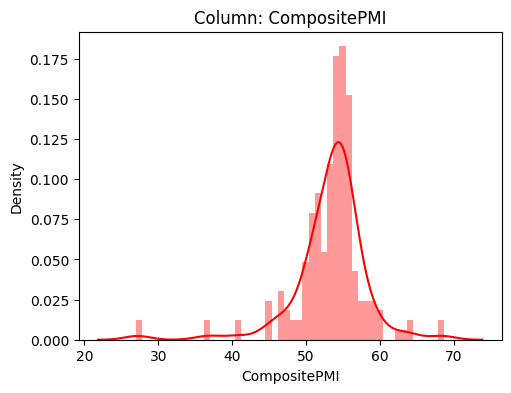

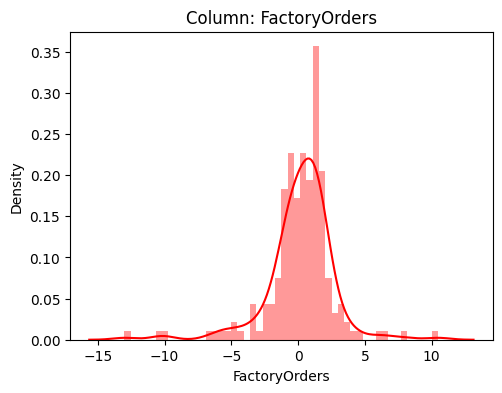

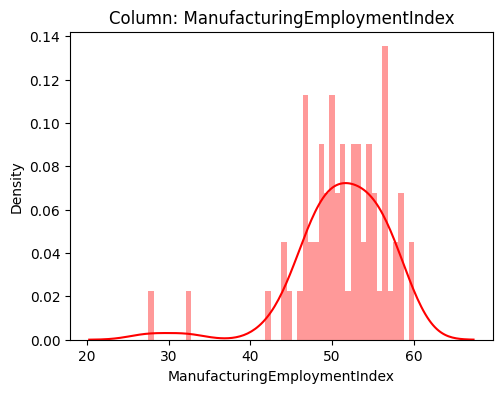

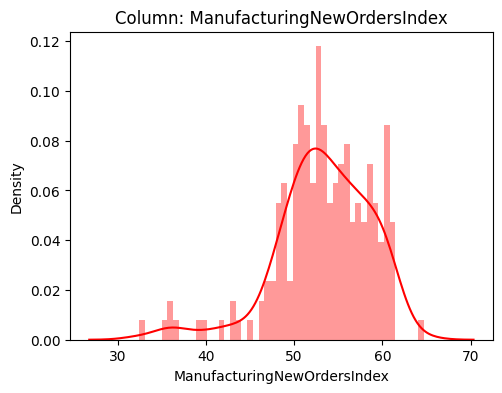

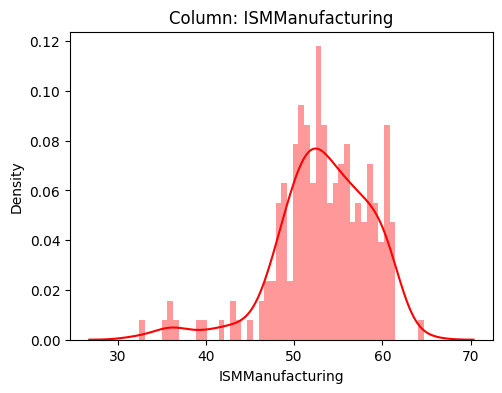

In [95]:

# Loop through each column
for column in final_df.columns:    
    f= plt.figure(figsize=(12,4))
    ax=f.add_subplot(121)
    sns.distplot(final_df[column],bins=50,color='r',ax=ax)
    ax.set_title(f"Column: {column}")



# ax=f.add_subplot(121)
# sns.distplot(final_df['manufaturing'],bins=50,color='r',ax=ax)
# ax.set_title('Distribution of actual values - ')

# ax=f.add_subplot(122)
# sns.distplot(np.log10(final_df['unemployment']),bins=40,color='b',ax=ax)
# ax.set_title('Distribution of actual values in $log$ sacle')
# ax.set_xscale('log');

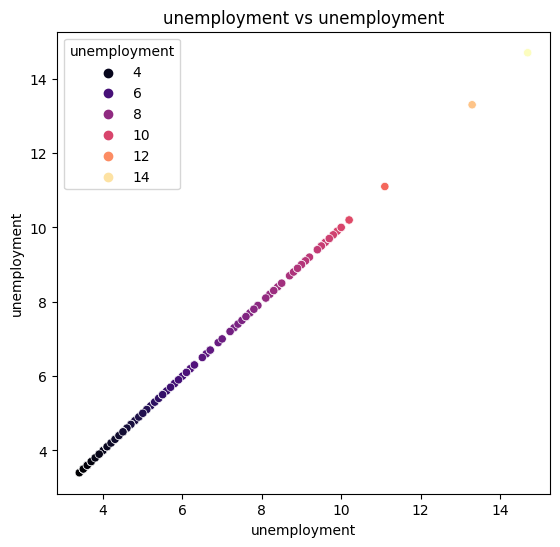

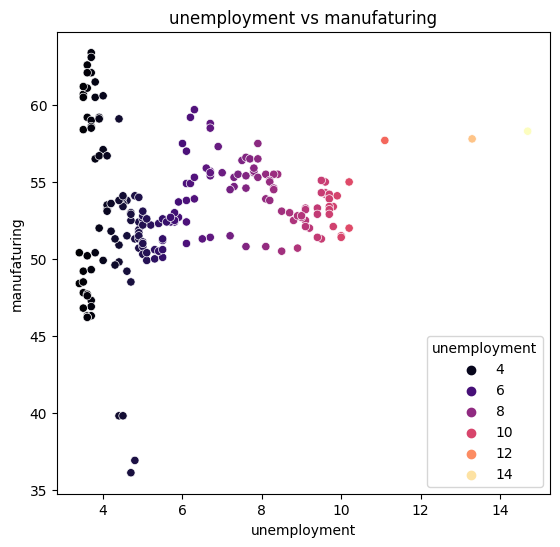

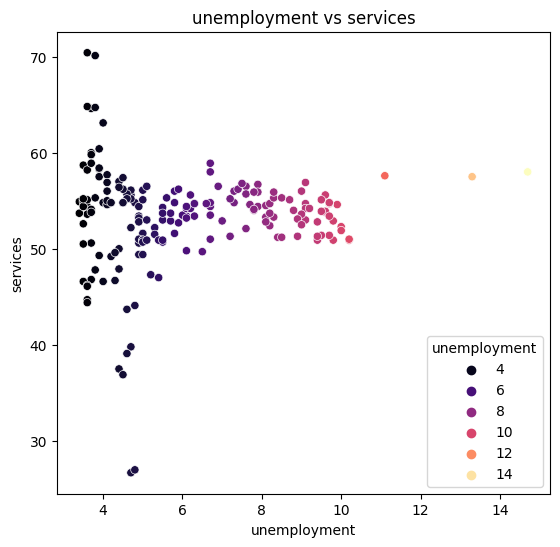

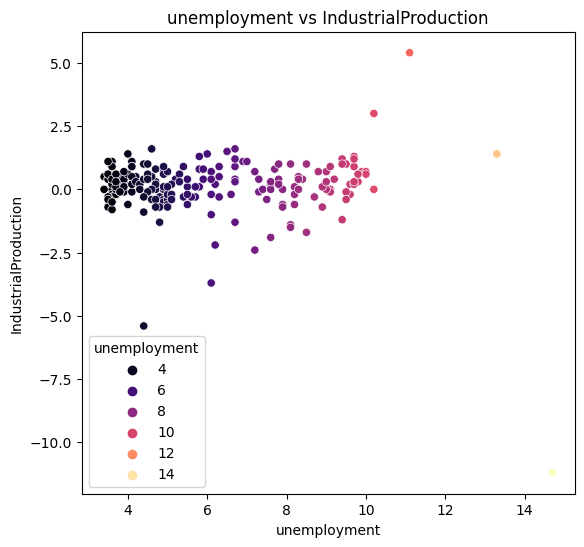

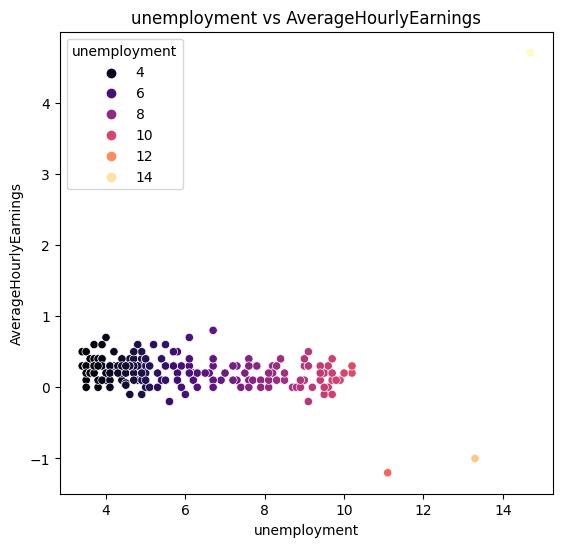

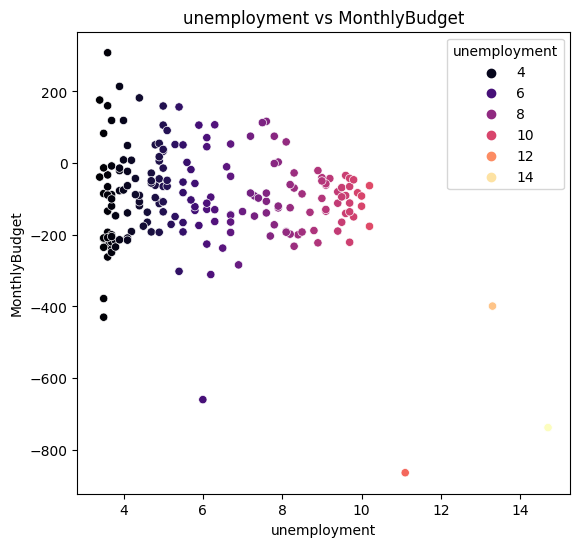

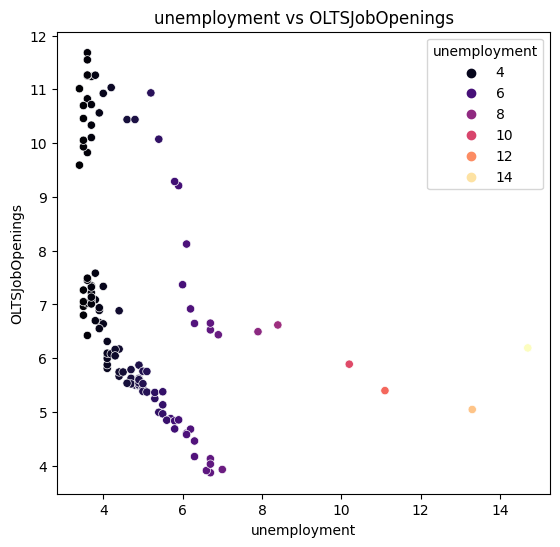

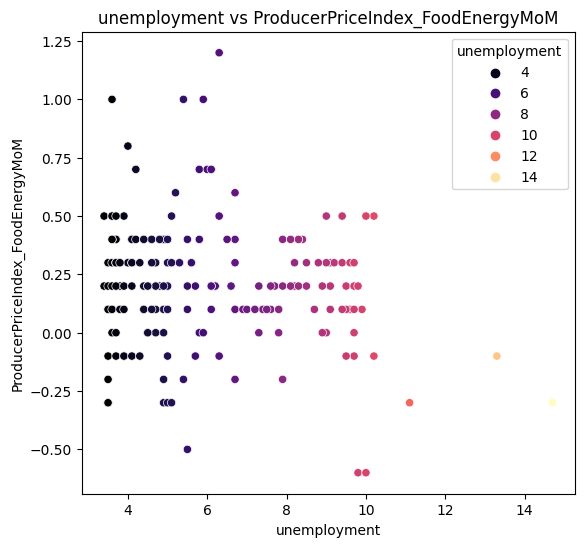

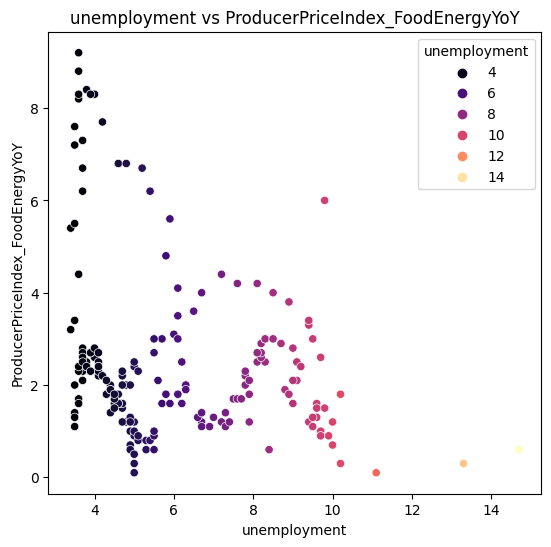

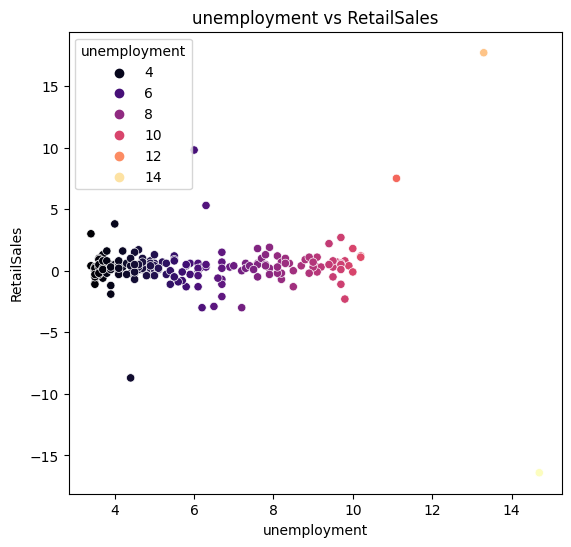

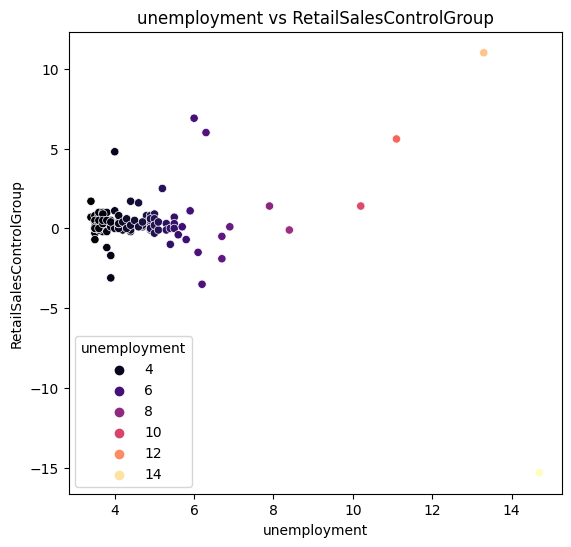

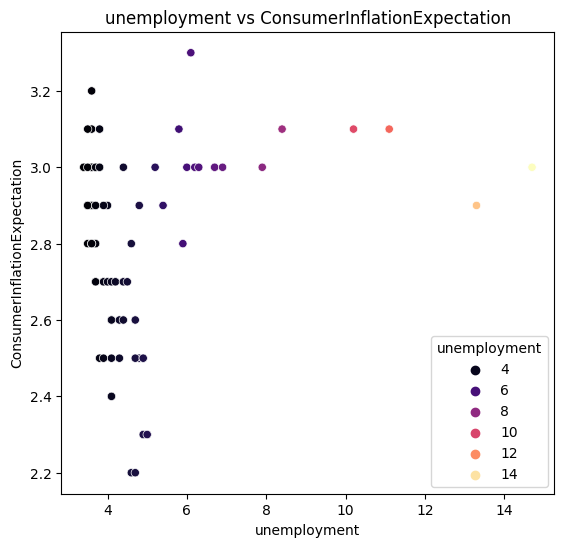

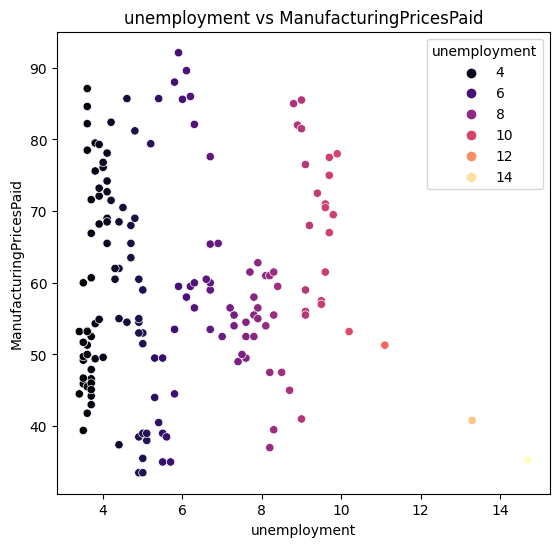

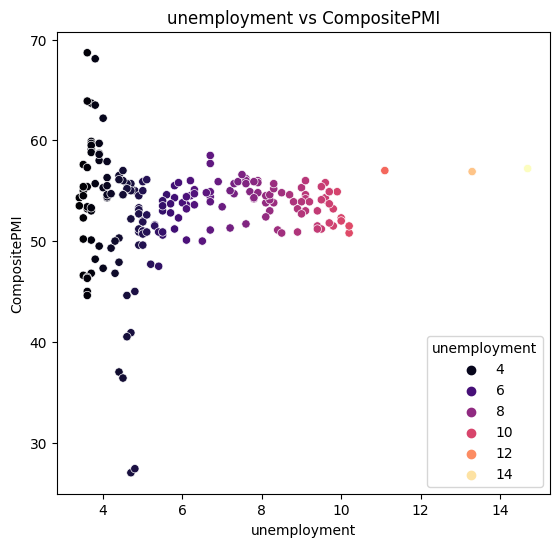

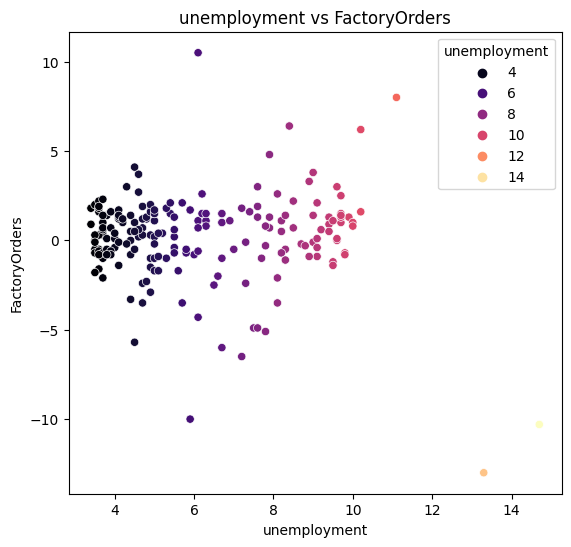

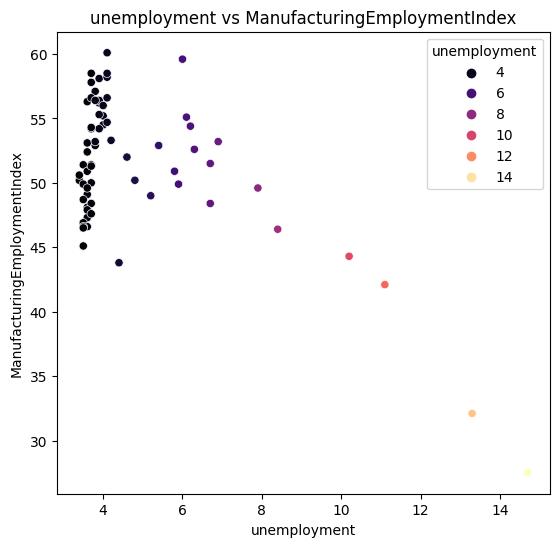

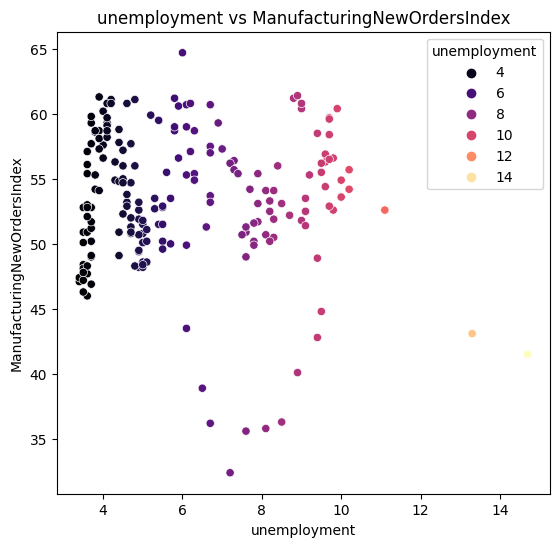

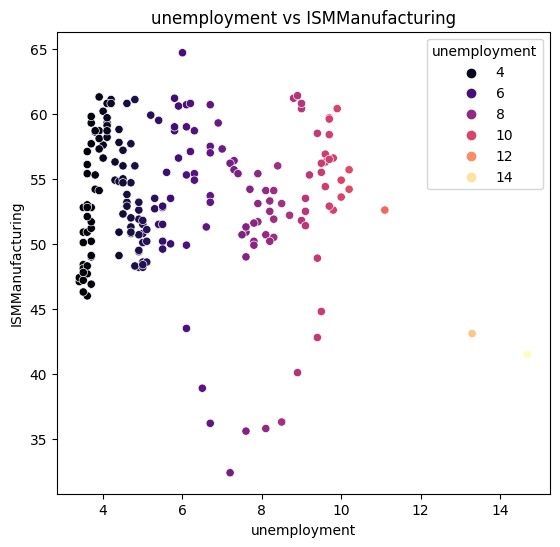

In [98]:
# Loop through each column
for column in final_df.columns:    

    f = plt.figure(figsize=(14,6))
    ax = f.add_subplot(121)
    sns.scatterplot(x='unemployment',y=column,data=final_df,palette='magma',hue='unemployment',ax=ax)
    ax.set_title(f"unemployment vs {column}")

# ax = f.add_subplot(122)
# sns.scatterplot(x='unemployment',y='services',data=final_df,palette='viridis',hue='unemployment')
# ax.set_title('Scatter plot of unemployment vs services')
# plt.savefig('sc.png');

In [99]:
from sklearn.model_selection import train_test_split
X = final_df.drop('unemployment',axis=1) # Independet variable
y = final_df['unemployment'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [100]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [101]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [102]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  4.5577191855308135
R square obtain for normal equation method is : -0.032804234747620065


In [15]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  4.557719185530905
R square obtain for scikit learn library is : -0.03280423474764094


C:\Users\ACER\AppData\Local\Temp\ipykernel_20228\1143727541.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


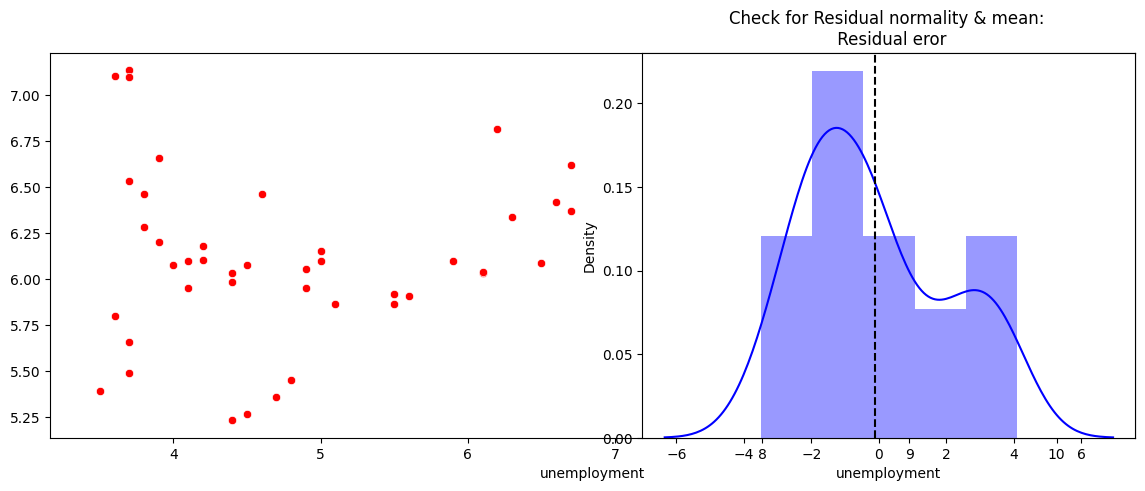

In [16]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
sns.scatterplot(x=y_test,y=y_pred_sk, color='r')
# sns.scatterplot(data = ax, color='b')


ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

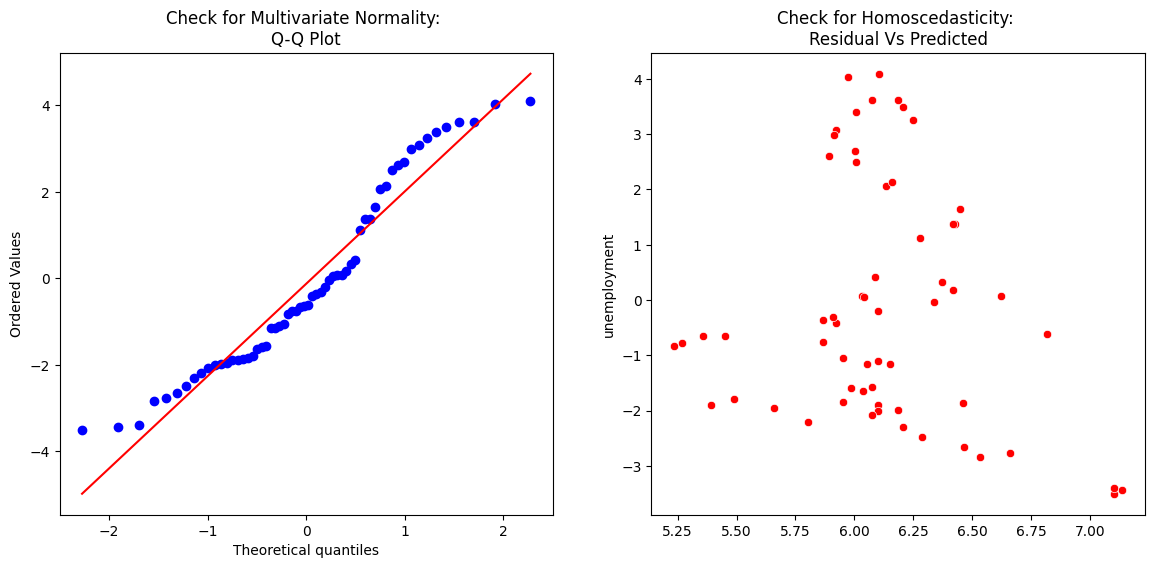

In [17]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [18]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

0.9682377030961182

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a separate test dataset X_test and y_test

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

R-squared: -0.03280423474764094
Mean Squared Error (MSE): 4.557719185530905


# Logistic Regression


In [23]:

X = final_df.drop('unemployment',axis=1) # Independet variable
y = final_df['unemployment'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

ValueError: Unknown label type: 'continuous'